In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
df = pd.read_excel('DraftedPlayers2009-2021.xlsx')
df

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL
0,NaN,NaN,NaN,NaN,NUMBER,PICK,PICK
1,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1
2,Jalen Green,Houston Rockets,Ignite (G League),2021.0,1,2,2
3,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3
4,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4
...,...,...,...,...,...,...,...
776,Ahmad Nivins,Dallas Mavericks,Saint Joseph's,2009.0,2,26,56
777,Emir Preldzic,Phoenix Suns,Fenerbahce S.K. (Turkey),2009.0,2,27,57
778,Lester Hudson,Boston Celtics,Tennessee-Martin,2009.0,2,28,58
779,Chinemelu Elonu,Los Angeles Lakers,Texas A&M,2009.0,2,29,59


In [3]:
df2 = pd.read_csv('CollegeBasketballPlayers2009-2021.csv')
df2

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (27) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,DeAndrae Ross,South Alabama,SB,26,29.5,97.3,16.6,42.5,44.43,1.6,...,-1.941150,0.1923,0.6154,0.8077,1.1923,0.3462,0.0385,3.8846,NaN,6.22026
1,Pooh Williams,Utah St.,WAC,34,60.9,108.3,14.9,52.4,54.48,3.8,...,-0.247934,0.6765,1.2647,1.9412,1.8235,0.4118,0.2353,5.9412,NaN,3.94375
2,Jesus Verdejo,South Florida,BE,27,72.0,96.2,21.8,45.7,47.98,2.1,...,-0.883163,0.6296,2.3333,2.9630,1.9630,0.4815,0.0000,12.1852,NaN,10.92680
3,Mike Hornbuckle,Pepperdine,WCC,30,44.5,97.7,16.0,53.6,53.69,4.1,...,-0.393459,0.7000,1.4333,2.1333,1.1000,0.5667,0.1333,4.9333,NaN,6.77427
4,Anthony Brown,Pacific,BW,33,56.2,96.5,22.0,52.8,54.31,8.3,...,-0.668318,1.4242,3.3030,4.7273,0.8485,0.4545,0.3333,7.5758,NaN,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61056,Trey Patterson,Villanova,BE,2,0.3,60.5,19.3,0.0,0.00,0.0,...,16.018200,0.0000,0.0000,0.0000,0.5000,0.5000,0.0000,0.0000,Pure PG,0.00000
61057,Stavros Polatoglou,Northwestern St.,Slnd,4,1.3,28.3,7.1,0.0,0.00,7.0,...,-4.993820,0.2500,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,C,0.00000
61058,Sandy Ryan,Tulane,Amer,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-1.126810,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000
61059,Ty Larson,Texas Tech,B12,1,0.1,0.0,0.0,0.0,0.00,0.0,...,-2.380750,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,PF/C,0.00000


In [4]:
df2[df2['player_name']== 'Kyrie Irving']

,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
13221,Kyrie Irving,Duke,ACC,11,20.5,130.5,27.2,61.5,69.7,2.3,...,4.37825,0.5455,2.8182,3.3636,4.2727,1.4545,0.5455,17.4545,Scoring PG,7.29491


In [5]:
df2.columns

Index(['player_name', 'team', 'conf', 'GP', 'Min_per', 'Ortg', 'usg', 'eFG',
       'TS_per', 'ORB_per', 'DRB_per', 'AST_per', 'TO_per', 'FTM', 'FTA',
       'FT_per', 'twoPM', 'twoPA', 'twoP_per', 'TPM', 'TPA', 'TP_per',
       'blk_per', 'stl_per', 'ftr', 'yr', 'ht', 'num', 'porpag', 'adjoe',
       'pfr', 'year', 'pid', 'type', 'Rec Rank', 'ast/tov', 'rimmade',
       'rimmade+rimmiss', 'midmade', 'midmade+midmiss',
       'rimmade/(rimmade+rimmiss)', 'midmade/(midmade+midmiss)', 'dunksmade',
       'dunksmiss+dunksmade', 'dunksmade/(dunksmade+dunksmiss)', 'pick',
       'drtg', 'adrtg', 'dporpag', 'stops', 'bpm', 'obpm', 'dbpm', 'gbpm',
       'mp', 'ogbpm', 'dgbpm', 'oreb', 'dreb', 'treb', 'ast', 'stl', 'blk',
       'pts', 'Unnamed: 64', 'Unnamed: 65'],
      dtype='object')

In [6]:
df3 = pd.merge(df, df2, how='left', left_on='PLAYER', right_on='player_name')
df3

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,NaN,NaN,NaN,NaN,NUMBER,PICK,PICK,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1,Cade Cunningham,Oklahoma St.,B12,...,2.536370,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,8.872600
2,Jalen Green,Houston Rockets,Ignite (G League),2021.0,1,2,2,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3,Evan Mobley,USC,P12,...,5.252480,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,2.101970
4,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4,Scottie Barnes,Florida St.,ACC,...,2.995100,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,3.850450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1666,Ahmad Nivins,Dallas Mavericks,Saint Joseph's,2009.0,2,26,56,Ahmad Nivins,Saint Joseph's,A10,...,0.898667,3.9375,7.8750,11.8125,1.0000,0.8125,1.7500,19.1562,NaN,0.048109
1667,Emir Preldzic,Phoenix Suns,Fenerbahce S.K. (Turkey),2009.0,2,27,57,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1668,Lester Hudson,Boston Celtics,Tennessee-Martin,2009.0,2,28,58,Lester Hudson,Tennessee Martin,OVC,...,1.135300,2.2000,5.8667,8.0667,4.1333,2.1000,0.6000,27.7333,NaN,14.790600
1669,Chinemelu Elonu,Los Angeles Lakers,Texas A&M,2009.0,2,29,59,Chinemelu Elonu,Texas A&M,B12,...,2.007480,2.7879,4.4242,7.2121,0.3030,0.3030,1.5758,9.7273,NaN,0.000000


In [7]:
perc = 50.0 
min_count =  int(((100-perc)/100)*df3.shape[1] + 1)
mod_df = df3.dropna( axis=0, 
                    thresh=min_count)

mod_df = mod_df.reset_index(drop=True)
mod_df


,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1,Cade Cunningham,Oklahoma St.,B12,...,2.536370,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,8.872600
1,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3,Evan Mobley,USC,P12,...,5.252480,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,2.101970
2,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4,Scottie Barnes,Florida St.,ACC,...,2.995100,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,3.850450
3,Jalen Suggs,Orlando Magic,Gonzaga,2021.0,1,5,5,Jalen Suggs,Gonzaga,WCC,...,4.111230,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,6.422830
4,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Franz Wagner,Michigan,B10,...,3.054800,0.8889,4.7037,5.5926,1.0000,1.2593,0.5926,11.5556,Wing F,9.227110
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,Patty Mills,Portland Trail Blazers,St. Mary's (CA),2009.0,2,25,55,Patty Mills,Saint Mary's,WCC,...,2.186160,0.4583,1.8333,2.2917,3.7917,2.2083,0.2083,18.6250,NaN,14.264300
1483,Ahmad Nivins,Dallas Mavericks,Saint Joseph's,2009.0,2,26,56,Ahmad Nivins,Saint Joseph's,A10,...,0.898667,3.9375,7.8750,11.8125,1.0000,0.8125,1.7500,19.1562,NaN,0.048109
1484,Lester Hudson,Boston Celtics,Tennessee-Martin,2009.0,2,28,58,Lester Hudson,Tennessee Martin,OVC,...,1.135300,2.2000,5.8667,8.0667,4.1333,2.1000,0.6000,27.7333,NaN,14.790600
1485,Chinemelu Elonu,Los Angeles Lakers,Texas A&M,2009.0,2,29,59,Chinemelu Elonu,Texas A&M,B12,...,2.007480,2.7879,4.4242,7.2121,0.3030,0.3030,1.5758,9.7273,NaN,0.000000


In [8]:
pd.concat(g for _, g in mod_df.groupby("PLAYER") if len(g) > 1)

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,...,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
387,Aaron Holiday,Indiana Pacers,California-Los Angeles,2018.0,1,23,23,Aaron Holiday,UCLA,P12,...,1.405550,0.5938,2.4062,3.0000,3.9688,1.4062,0.2500,10.3438,Scoring PG,5.10103
388,Aaron Holiday,Indiana Pacers,California-Los Angeles,2018.0,1,23,23,Aaron Holiday,UCLA,P12,...,0.777734,0.3333,2.5278,2.8611,4.3889,1.0833,0.1667,12.2500,Scoring PG,7.33543
389,Aaron Holiday,Indiana Pacers,California-Los Angeles,2018.0,1,23,23,Aaron Holiday,UCLA,P12,...,0.140775,0.5152,3.1515,3.6667,5.8182,1.2727,0.2424,20.3333,Scoring PG,9.19170
137,Aaron Nesmith,Boston Celtics,Vanderbilt,2020.0,1,14,14,Aaron Nesmith,Vanderbilt,SEC,...,1.349930,1.0625,4.4688,5.5312,1.4062,0.7188,0.5625,11.0312,Stretch 4,10.88530
138,Aaron Nesmith,Boston Celtics,Vanderbilt,2020.0,1,14,14,Aaron Nesmith,Vanderbilt,SEC,...,0.281327,0.7857,4.0714,4.8571,0.9286,1.4286,0.8571,23.0000,Wing G,13.08560
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402,Willie Warren,Los Angeles Clippers,Oklahoma,2010.0,2,24,54,Willie Warren,Oklahoma,B12,...,-0.483223,0.6667,2.6190,3.2857,4.0952,1.0000,0.0476,16.3333,Scoring PG,8.48970
914,Xavier Thames,Toronto Raptors,San Diego State,2014.0,2,29,59,Xavier Thames,Washington St.,P10,...,0.876330,0.4333,1.0333,1.4667,1.2667,0.8000,0.0333,4.7333,Combo G,3.75081
915,Xavier Thames,Toronto Raptors,San Diego State,2014.0,2,29,59,Xavier Thames,San Diego St.,MWC,...,1.318630,0.4839,2.7419,3.2258,4.1290,0.9677,0.2258,10.0968,Scoring PG,2.97591
916,Xavier Thames,Toronto Raptors,San Diego State,2014.0,2,29,59,Xavier Thames,San Diego St.,MWC,...,1.998540,0.4643,2.2143,2.6786,2.3929,1.0714,0.3214,9.2857,Combo G,7.46849


In [9]:
pd.set_option('display.max_columns',None)
mod_df[mod_df['PLAYER']== 'Franz Wagner']

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
4,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Franz Wagner,Michigan,B10,27.0,66.1,105.5,18.6,53.4,56.59,3.4,16.8,5.9,15.0,45.0,54.0,0.833,72.0,118.0,0.610,41.0,132.0,0.311,1.8,2.4,21.6,Fr,9-Jun,21.0,2.56112,109.684,3.3,2020.0,70394.0,all,90.2,0.674992,65.0,97.0,7.0,21.0,0.6701,0.3333,8.0,8.0,1.0,8.0,95.3591,88.1723,4.12090,171.133,5.85695,2.63123,3.22572,5.45181,30.7407,2.39701,3.05480,0.8889,4.7037,5.5926,1.0,1.2593,0.5926,11.5556,Wing F,9.22711
5,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Franz Wagner,Michigan,B10,28.0,78.8,119.5,19.4,54.4,58.65,2.9,19.6,17.4,12.5,66.0,79.0,0.835,89.0,158.0,0.563,35.0,102.0,0.343,3.2,2.3,30.4,So,9-Jun,21,4.39131,125.382,2.8,2021.0,70394.0,all,90.2,2.333359,63.0,93.0,26.0,65.0,0.6774,0.4000,11.0,11.0,1.0,8.0,91.2358,84.4309,4.68658,201.179,11.31880,5.41689,5.90190,10.60920,31.6786,5.27693,5.33229,0.7143,5.8214,6.5357,3.0,1.2500,1.0357,12.4643,Wing F,6.88085


In [10]:
mod_df.drop_duplicates(subset ="PLAYER",keep = 'last', inplace = True)
mod_df

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1,Cade Cunningham,Oklahoma St.,B12,27.0,78.0,104.1,28.6,51.6,57.46,2.3,16.2,20.2,22.0,132.0,156.0,0.846,114.0,246.0,0.463,62.0,155.0,0.400,2.3,2.5,38.9,Fr,8-Jun,2,4.33352,121.343,2.8,2021.0,72372.0,all,100.0,0.845438,67.0,108.0,46.0,137.0,0.6204,0.3358,7.0,9.0,0.7778,1.0,96.0766,89.9995,4.47388,207.722,6.28955,3.19980,3.089750,7.41636,35.4074,4.87999,2.536370,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,8.872600
1,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3,Evan Mobley,USC,P12,33.0,83.6,119.4,23.4,59.5,62.40,9.7,18.8,14.1,16.6,134.0,193.0,0.694,185.0,301.0,0.615,12.0,40.0,0.300,8.7,1.4,56.6,Fr,Jul-00,4,5.41065,131.894,2.1,2021.0,72870.0,all,99.6,1.067562,113.0,144.0,72.0,157.0,0.7847,0.4586,63.0,66.0,0.9545,3.0,90.3800,84.1470,5.00113,256.359,13.00120,5.53482,7.466380,12.64050,33.9394,7.38800,5.252480,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,2.101970
2,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4,Scottie Barnes,Florida St.,ACC,24.0,58.9,107.5,25.3,53.1,54.78,7.4,11.0,31.6,22.4,41.0,66.0,0.621,87.0,155.0,0.561,11.0,40.0,0.275,2.1,3.4,33.8,Fr,9-Jun,4,2.97007,120.140,3.5,2021.0,72657.0,all,99.0,1.661026,61.0,89.0,26.0,66.0,0.6854,0.3939,19.0,21.0,0.9048,4.0,97.4474,91.9916,3.00240,119.770,8.27087,4.94571,3.325160,7.19008,24.7917,4.19499,2.995100,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,3.850450
3,Jalen Suggs,Orlando Magic,Gonzaga,2021.0,1,5,5,Jalen Suggs,Gonzaga,WCC,30.0,67.5,110.4,25.3,55.9,59.39,2.7,18.0,23.7,21.5,86.0,114.0,0.754,119.0,203.0,0.586,35.0,104.0,0.337,1.1,3.5,37.1,Fr,4-Jun,1,3.79887,123.251,3.6,2021.0,72863.0,all,98.2,1.545461,97.0,152.0,21.0,49.0,0.6382,0.4286,9.0,10.0,0.9000,5.0,90.1850,85.8594,4.13889,209.261,9.32632,4.85317,4.473150,8.48340,28.9333,4.37217,4.111230,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,6.422830
5,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Franz Wagner,Michigan,B10,28.0,78.8,119.5,19.4,54.4,58.65,2.9,19.6,17.4,12.5,66.0,79.0,0.835,89.0,158.0,0.563,35.0,102.0,0.343,3.2,2.3,30.4,So,9-Jun,21,4.39131,125.382,2.8,2021.0,70394.0,all,90.2,2.333359,63.0,93.0,26.0,65.0,0.6774,0.4000,11.0,11.0,1.0000,8.0,91.2358,84.4309,4.68658,201.179,11.31880,5.41689,5.901900,10.60920,31.6786,5.27693,5.332290,0.7143,5.8214,6.5357,3.0000,1.2500,1.0357,12.4643,Wing F,6.880850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1482,Patty Mills,Portland Trail Blazers,St. Mary's (CA),2009.0,2,25,55,Patty Mills,Saint Mary's,WCC,24.0,61.7,108.8,29.0,47.6,52.27,1.6,6.0,25.9,17.1,84.0,98.0,0.857,87.0,191.0,0.455,63.0,190.0,0.332,0.6,3.9,25.7,So,Jun-00,NaN,4.66241,123.834,2.0,2009.0,49733.0,all,NaN,1.378800,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,55.0,98.5130,97.1169,3.43490,143.825,5.16627,4.90741,0.258865,7.47588,33.9583,5.28972,2.186160,0.4583,1.8333,2.2917,3.7917,2.2083,0.2083,18.6250,NaN,14.264300
1483,Ahmad Nivins,Dallas Mavericks,Saint Joseph's,2009.0,2,26,56,Ahmad Nivins,Saint Joseph's,A10,32.0,96.5,119.7,22.9,61.2,66.99,12.5,22.6,6.1,18.3,203.0,258.0,0.787,205.0,334.0,0.614,0.0,1.0,0.000,4.6,1.3,77.0,Sr,9-Jun,NaN,5.71878,126.974,2.2,2009.0,3344.0,all,73.8,0.367809,NaN,NaN,NaN,NaN,NaN,NaN,

In [11]:
mod_df['Unnamed: 64'] = mod_df['Unnamed: 64'].fillna('Unknown')
null = mod_df[mod_df.columns[mod_df.isnull().any()]]

In [12]:
mod_df = mod_df[mod_df['rimmade'].notna()]
mod_df = mod_df.fillna(0)
mod_df

,PLAYER,TEAM,AFFILIATION,YEAR,ROUND,ROUND.1,OVERALL,player_name,team,conf,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,yr,ht,num,porpag,adjoe,pfr,year,pid,type,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 64,Unnamed: 65
0,Cade Cunningham,Detroit Pistons,Oklahoma State,2021.0,1,1,1,Cade Cunningham,Oklahoma St.,B12,27.0,78.0,104.1,28.6,51.6,57.46,2.3,16.2,20.2,22.0,132.0,156.0,0.846,114.0,246.0,0.463,62.0,155.0,0.400,2.3,2.5,38.9,Fr,8-Jun,2,4.33352,121.343,2.8,2021.0,72372.0,all,100.0,0.845438,67.0,108.0,46.0,137.0,0.6204,0.3358,7.0,9.0,0.7778,1.0,96.0766,89.9995,4.47388,207.7220,6.289550,3.199800,3.089750,7.41636,35.4074,4.879990,2.536370,0.7037,5.4815,6.1852,3.4444,1.5926,0.7778,20.2222,Wing F,8.87260
1,Evan Mobley,Cleveland Cavaliers,Southern California,2021.0,1,3,3,Evan Mobley,USC,P12,33.0,83.6,119.4,23.4,59.5,62.40,9.7,18.8,14.1,16.6,134.0,193.0,0.694,185.0,301.0,0.615,12.0,40.0,0.300,8.7,1.4,56.6,Fr,Jul-00,4,5.41065,131.894,2.1,2021.0,72870.0,all,99.6,1.067562,113.0,144.0,72.0,157.0,0.7847,0.4586,63.0,66.0,0.9545,3.0,90.3800,84.1470,5.00113,256.3590,13.001200,5.534820,7.466380,12.64050,33.9394,7.388000,5.252480,2.7273,5.9394,8.6667,2.3939,0.7879,2.8485,16.3636,C,2.10197
2,Scottie Barnes,Toronto Raptors,Florida State,2021.0,1,4,4,Scottie Barnes,Florida St.,ACC,24.0,58.9,107.5,25.3,53.1,54.78,7.4,11.0,31.6,22.4,41.0,66.0,0.621,87.0,155.0,0.561,11.0,40.0,0.275,2.1,3.4,33.8,Fr,9-Jun,4,2.97007,120.140,3.5,2021.0,72657.0,all,99.0,1.661026,61.0,89.0,26.0,66.0,0.6854,0.3939,19.0,21.0,0.9048,4.0,97.4474,91.9916,3.00240,119.7700,8.270870,4.945710,3.325160,7.19008,24.7917,4.194990,2.995100,1.4583,2.5417,4.0000,4.0833,1.4583,0.4583,10.3333,Scoring PG,3.85045
3,Jalen Suggs,Orlando Magic,Gonzaga,2021.0,1,5,5,Jalen Suggs,Gonzaga,WCC,30.0,67.5,110.4,25.3,55.9,59.39,2.7,18.0,23.7,21.5,86.0,114.0,0.754,119.0,203.0,0.586,35.0,104.0,0.337,1.1,3.5,37.1,Fr,4-Jun,1,3.79887,123.251,3.6,2021.0,72863.0,all,98.2,1.545461,97.0,152.0,21.0,49.0,0.6382,0.4286,9.0,10.0,0.9000,5.0,90.1850,85.8594,4.13889,209.2610,9.326320,4.853170,4.473150,8.48340,28.9333,4.372170,4.111230,0.6000,4.7333,5.3333,4.5333,1.9000,0.3333,14.3000,Combo G,6.42283
5,Franz Wagner,Orlando Magic,Michigan,2021.0,1,8,8,Franz Wagner,Michigan,B10,28.0,78.8,119.5,19.4,54.4,58.65,2.9,19.6,17.4,12.5,66.0,79.0,0.835,89.0,158.0,0.563,35.0,102.0,0.343,3.2,2.3,30.4,So,9-Jun,21,4.39131,125.382,2.8,2021.0,70394.0,all,90.2,2.333359,63.0,93.0,26.0,65.0,0.6774,0.4000,11.0,11.0,1.0000,8.0,91.2358,84.4309,4.68658,201.1790,11.318800,5.416890,5.901900,10.60920,31.6786,5.276930,5.332290,0.7143,5.8214,6.5357,3.0000,1.2500,1.0357,12.4643,Wing F,6.88085
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1413,Dwayne Collins,Phoenix Suns,Miami (FL),2010.0,2,30,60,Dwayne Collins,Miami FL,ACC,28.0,54.6,105.7,26.4,61.2,60.54,14.3,21.6,10.5,22.5,86.0,154.0,0.558,126.0,206.0,0.612,0.0,0.0,0.000,5.1,1.5,74.8,Sr,8-Jun,21,2.90439,118.033,3.9,2010.0,2387.0,all,77.6,0.471440,97.0,131.0,29.0,75.0,0.7405,0.3867,49.0,54.0,0.9074,60.0,94.2041,92.8863,2.91224,146.9020,5.131820,2.738110,2.393700,4.66374,24.9643,3.749390,0.914353,2.9643,4.7500,7.7143,1.1786,0.6071,1.1429,12.0714,C,0.00000
1424,Jordan Hill,New York Knicks,Arizona,2009.0,1,8,8,Jordan Hill,Seattle,WAC,31.0,83.3,98.1,23.7,48.5,52.00,1.9,9.6,20.5,21.5,73.0,96.0,0.760,70.0,167.0,0.419,71.0,197.0,0.360,1.1,2.0,26.4,Sr,4-Jun,2,1.66986,101.896,3.9,2018.0,30517.0,all,29.6,1.151500,33.0,63.0,35.0,104.0,0.5238,0

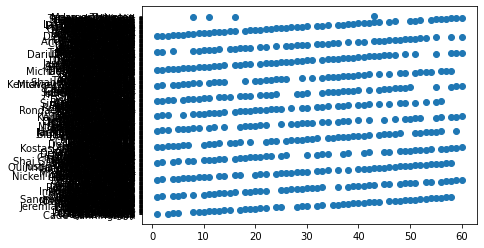

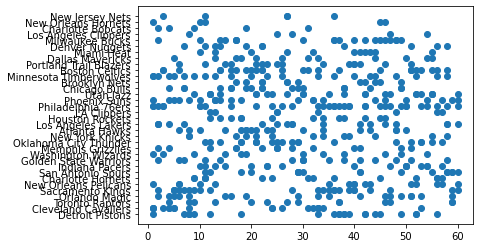

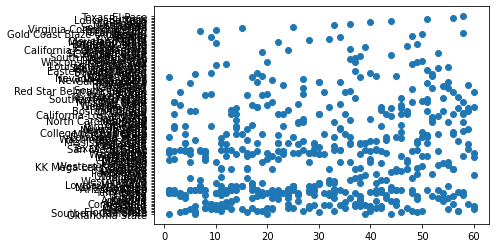

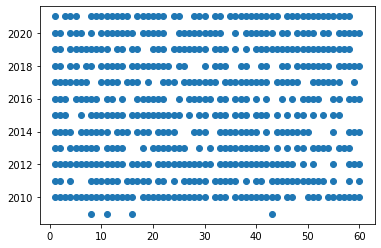

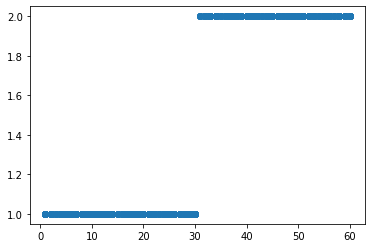

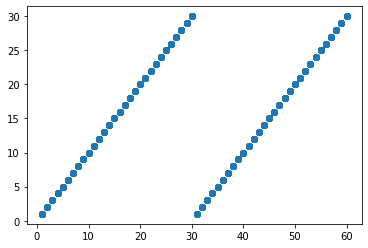

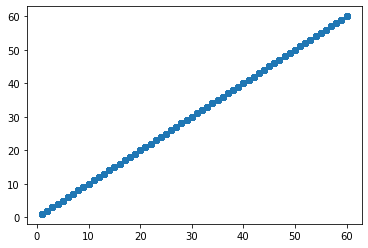

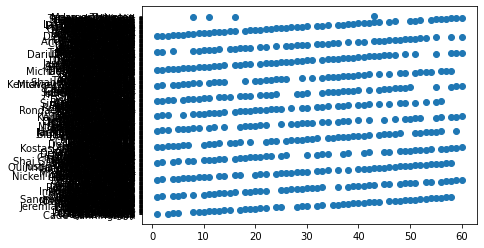

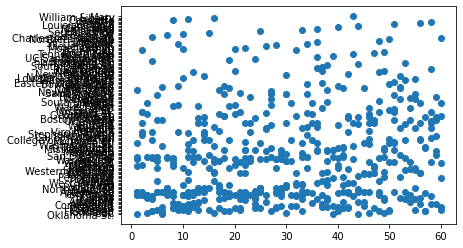

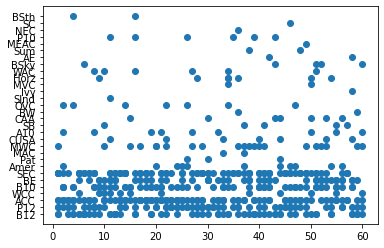

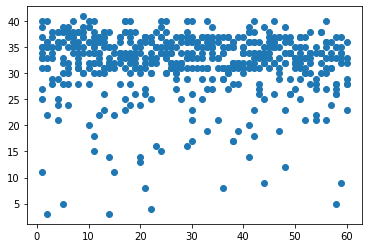

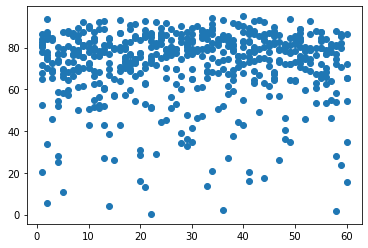

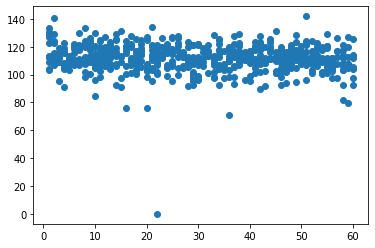

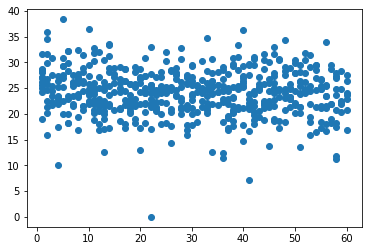

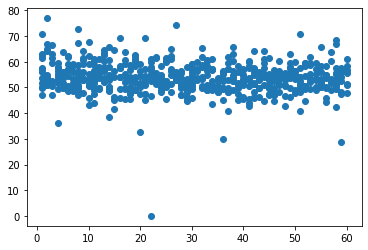

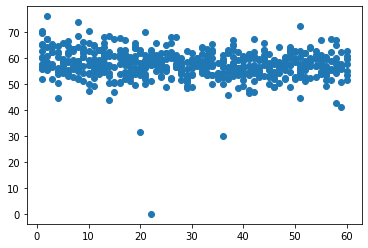

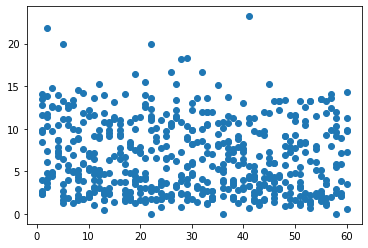

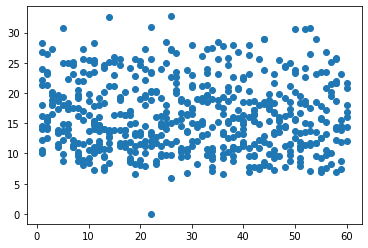

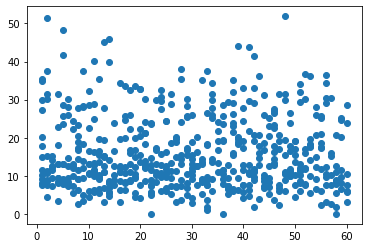

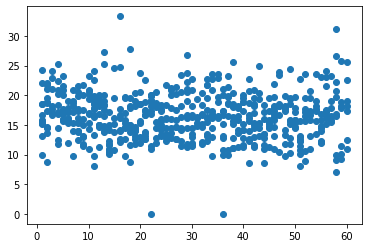

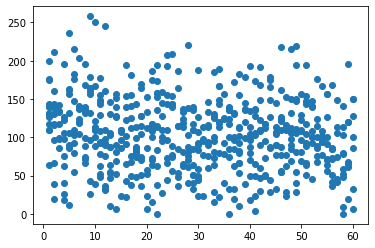

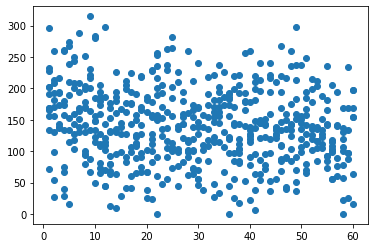

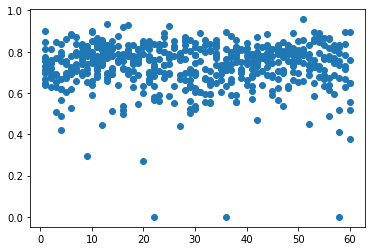

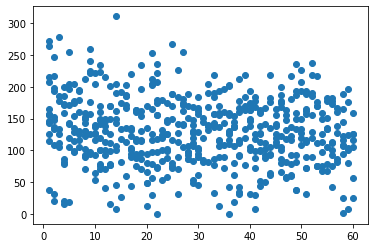

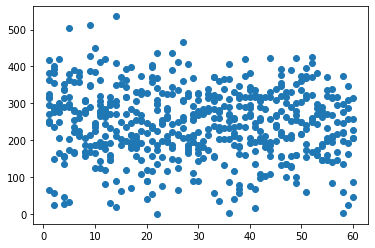

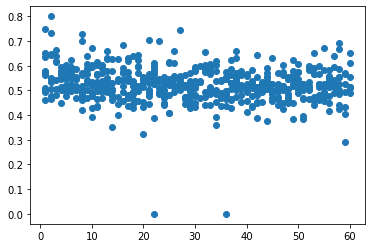

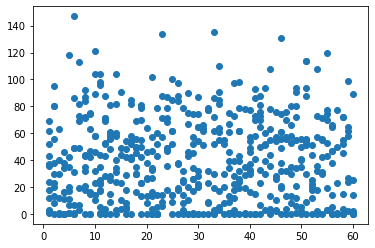

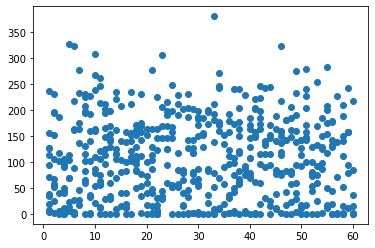

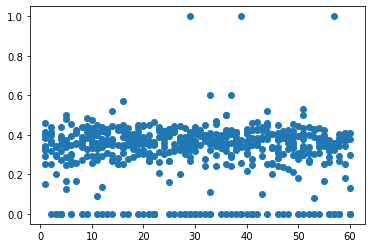

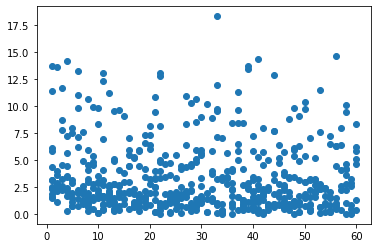

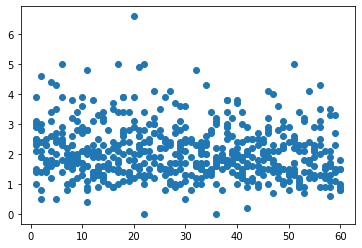

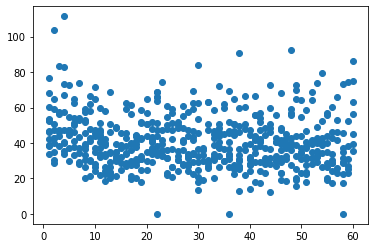

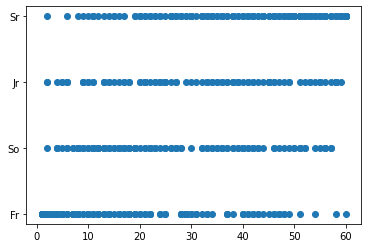

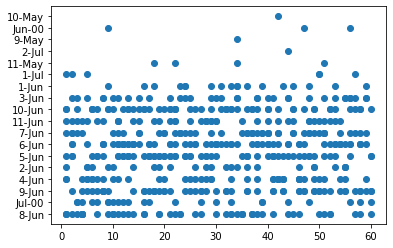

TypeError: 'value' must be an instance of str or bytes, not a float

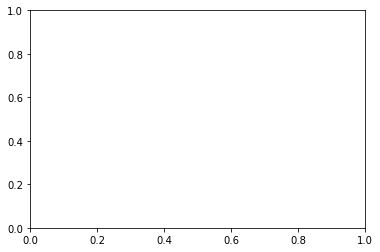

In [20]:
for column in mod_df:
    plt.scatter(mod_df['OVERALL'],mod_df[column])
    plt.show()

In [19]:
mod_df.corr(method='spearman')#['OVERALL']

,YEAR,ROUND,ROUND.1,OVERALL,GP,Min_per,Ortg,usg,eFG,TS_per,ORB_per,DRB_per,AST_per,TO_per,FTM,FTA,FT_per,twoPM,twoPA,twoP_per,TPM,TPA,TP_per,blk_per,stl_per,ftr,porpag,adjoe,pfr,year,pid,Rec Rank,ast/tov,rimmade,rimmade+rimmiss,midmade,midmade+midmiss,rimmade/(rimmade+rimmiss),midmade/(midmade+midmiss),dunksmade,dunksmiss+dunksmade,dunksmade/(dunksmade+dunksmiss),pick,drtg,adrtg,dporpag,stops,bpm,obpm,dbpm,gbpm,mp,ogbpm,dgbpm,oreb,dreb,treb,ast,stl,blk,pts,Unnamed: 65
YEAR,1.000000,0.034281,0.028722,0.044026,-0.298357,-0.066334,0.078323,0.004695,0.109530,0.119135,-0.164785,0.011535,0.088448,-0.029447,-0.169155,-0.224211,0.162782,-0.212228,-0.233608,0.040007,0.133599,0.115666,0.176022,-0.036722,0.048604,-0.189876,0.015193,0.082860,-0.051778,0.962434,0.922214,0.036177,0.101406,-0.104520,-0.068286,-0.234198,-0.281995,-0.141990,0.049725,-0.079505,-0.074260,-0.008830,0.061606,0.075301,0.060703,0.024183,-0.167050,-0.010016,0.024044,-0.025488,0.026045,-0.014186,0.026570,0.017410,-0.167006,0.015979,-0.061446,0.096802,0.061696,-0.049636,0.056888,0.186419
ROUND,0.034281,1.000000,-0.006629,0.865267,-0.089412,0.063369,-0.078104,-0.039270,-0.078996,-0.087925,-0.084069,-0.041382,0.013215,-0.022970,-0.064353,-0.081211,0.010851,-0.053444,-0.031445,-0.096118,0.032418,0.031742,0.000640,-0.078814,-0.119831,-0.095567,-0.077166,-0.125229,-0.063908,0.033597,-0.069239,-0.269353,0.058012,-0.079499,-0.053044,0.019294,0.013318,-0.135395,0.019851,-0.149807,-0.146359,0.001233,0.785654,0.147993,0.176479,-0.123013,-0.111169,-0.222474,-0.116046,-0.152322,-0.205936,0.046944,-0.120363,-0.175336,-0.080010,-0.040628,-0.060433,0.010508,-0.105905,-0.090736,-0.038286,0.029456
ROUND.1,0.028722,-0.006629,1.000000,0.495371,-0.076917,-0.026217,-0.077193,-0.084015,-0.078470,-0.093646,-0.041032,-0.032866,-0.041903,-0.059190,-0.127545,-0.147223,0.038450,-0.109018,-0.085284,-0.099190,-0.007802,-0.006877,-0.038978,-0.063256,-0.062133,-0.104838,-0.116029,-0.125366,0.000344,0.024813,-0.054606,-0.162193,0.008890,-0.118002,-0.117202,-0.009204,-0.009061,-0.061758,-0.047025,-0.099110,-0.101004,-0.013029,0.439786,0.088607,0.112393,-0.124694,-0.120539,-0.180640,-0.117573,-0.109673,-0.192740,-0.024567,-0.131240,-0.142316,-0.050456,-0.060040,-0.059449,-0.035713,-0.060648,-0.081681,-0.093928,-0.003986
OVERALL,0.044026,0.865267,0.495371,1.000000,-0.116158,0.043101,-0.106740,-0.076530,-0.108884,-0.124449,-0.093917,-0.052615,-0.009301,-0.050491,-0.120571,-0.145028,0.028437,-0.101598,-0.070351,-0.134511,0.025052,0.024888,-0.017881,-0.101169,-0.134524,-0.136961,-0.125453,-0.172186,-0.055838,0.041284,-0.087935,-0.316648,0.055498,-0.128756,-0.105295,0.012150,0.007211,-0.148873,-0.007297,-0.180879,-0.178853,-0.004988,0.903243,0.173080,0.209828,-0.169472,-0.157095,-0.284005,-0.159879,-0.187561,-0.275956,0.029465,-0.170718,-0.223875,-0.094839,-0.065753,-0.082502,-0.008489,-0.121705,-0.120813,-0.080503,0.024432
GP,-0.298357,-0.089412,-0.076917,-0.116158,1.000000,0.335796,0.289024,-0.061563,0.065190,0.085460,0.009857,-0.114031,0.025473,-0.208290,0.363810,0.374624,0.077516,0.383876,0.397760,0.042838,0.227865,0.234031,0.089781,-0.098744,-0.009738,-0.004558,0.239965,0.282004,-0.160501,-0.356520,-0.329687,0.129526,0.161356,0.334831,0.332791,0.336108,0.372133,0.130488,0.017446,0.182922,0.178036,0.095450,-0.009768,-0.126285,-0.204864,0.314933,0.538552,0.298816,0.323869,0.078548,0.251976,0.125273,0.221336,0.143059,0.042684,-0.038858,-0.001958,0.080842,0.037023,-0.061416,0.042266,0.036821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ast,0.096802,0.010508,-0.035713,-0.008489,0.080842,0.549592,0.059669,0.401755,-0.250867,-0.139565,-0.648216,-0.432099,0.975948,0.109287,0.318619,0.231632,0.394133,0.058243,0.173304,-0.336459,0.538903,0.557470,0.287139,-0.603555,0.486483,-0.188282,0.452672,0.267440,-0.5212